Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgdal-dev is already the newest version (3.6.4+dfsg-1~jammy0).
The following additional packages will be installed:
  python3-gdal python3-numpy
Suggested packages:
  libgdal-grass python-numpy-doc python3-pytest
The following NEW packages will be installed:
  gdal-bin python3-gdal python3-numpy
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 5,055 kB of archives.
After this operation, 25.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-numpy amd64 1:1.21.5-1ubuntu22.04.1 [3,467 kB]
Get:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 python3-gdal amd64 3.6.4+dfsg-1~jammy0 [1,027 kB]
Get:3 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 gdal-bin amd64 3.6.4+dfsg-1~jammy0 [561 kB]
Fetched 5,055 kB in 4s (1,380 kB/s)
Selecting previously unselected pa

Saving 50110.tfw to 50110.tfw
Saving 50110.tif to 50110.tif
Saving 50110.tif.aux.xml to 50110.tif.aux.xml
Saving 50110.tif.ovr to 50110.tif.ovr
Saving 50110.tif.vat.dbf to 50110.tif.vat.dbf
Saving 50110.tif.xml to 50110.tif.xml
Saving 50110.clr to 50110.clr
Saving 50110.qml to 50110.qml
Saving DATA016_산사태위험지도.pdf to DATA016_산사태위험지도.pdf
밴드 개수: 1
Data 범위: min=1, max=2147483647
속성 테이블(vat.dbf):
   Value      Count
0      1     6987.0
1      2    10996.0
2      3    39976.0
3      4   722674.0
4      5  2932564.0
색상표(color map):
{1: (1.0, 0.0, 0.0), 2: (1.0, 0.788235294117647, 0.0), 3: (0.7137254901960784, 1.0, 0.5568627450980392), 4: (0.18823529411764706, 0.7607843137254902, 1.0), 5: (0.0, 0.0, 1.0)}


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54744 (\N{HANGUL SYLLABLE HEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

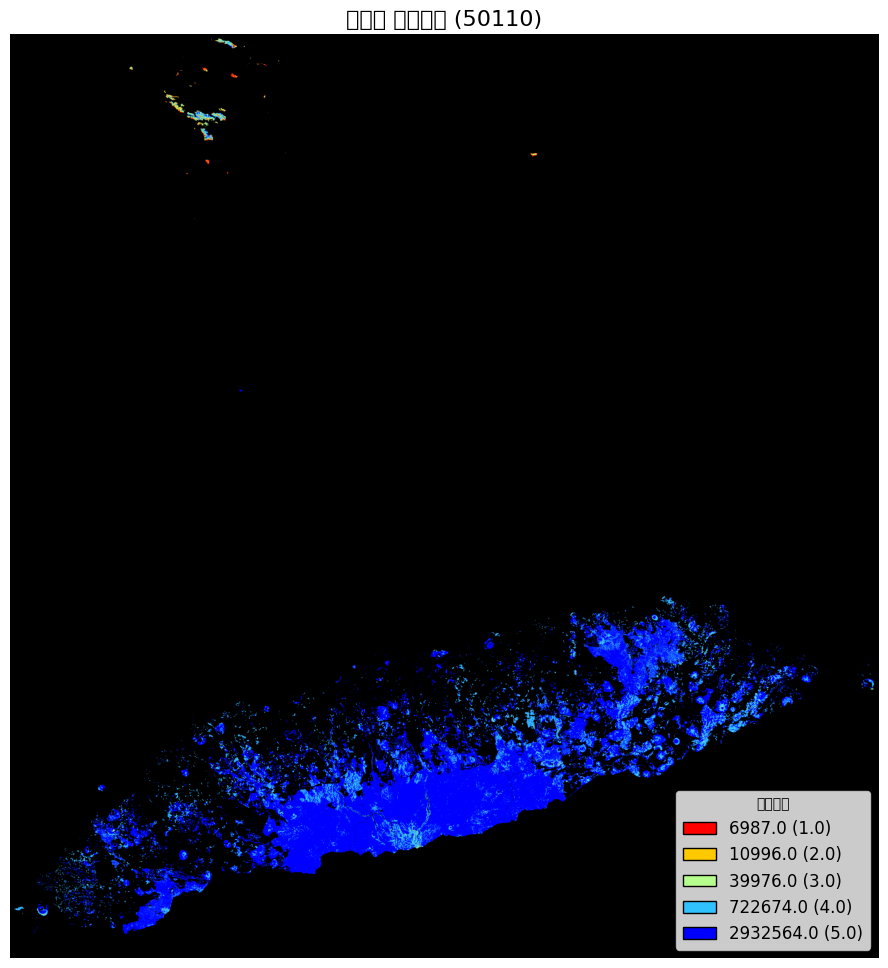

In [1]:
# 📦 필수 패키지 설치
!apt install -y gdal-bin libgdal-dev
!pip install geopandas rasterio matplotlib simpledbf

# 📂 파일 업로드
from google.colab import files
uploaded = files.upload()

# 🗂️ 패키지 불러오기
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from simpledbf import Dbf5

# 🗺️ GeoTIFF 파일 경로
tif_path = '50110.tif'

# 1️⃣ 주 래스터 데이터 불러오기
with rasterio.open(tif_path) as src:
    data = src.read(1)
    print(f'밴드 개수: {src.count}')
    print(f'Data 범위: min={np.min(data)}, max={np.max(data)}')

# 2️⃣ 속성 테이블(vat.dbf) 불러오기 → 값-의미 매핑
dbf = Dbf5('50110.tif.vat.dbf')
df_vat = dbf.to_dataframe()
print("속성 테이블(vat.dbf):")
print(df_vat)

# 3️⃣ 색상표(clr) 불러오기 → 값-색상 매핑
clr_path = '50110.clr'
color_map = {}

with open(clr_path, 'r') as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) == 4:
            value = int(parts[0])
            r, g, b = map(int, parts[1:])
            color_map[value] = (r / 255, g / 255, b / 255)  # matplotlib용 RGB(0~1)

print("색상표(color map):")
print(color_map)

# 4️⃣ 픽셀값 → RGB로 변환
rgb_image = np.zeros((data.shape[0], data.shape[1], 3))

for value, color in color_map.items():
    mask = data == value
    for i in range(3):
        rgb_image[:, :, i][mask] = color[i]

# 5️⃣ 시각화
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(rgb_image)
ax.set_title('산사태 위험지도 (50110)', fontsize=16)
ax.axis('off')

# 6️⃣ 범례 만들기
from matplotlib.patches import Patch

# vat.dbf에서 'VALUE', 'LABEL' 컬럼 추정 (컬럼명 다르면 df_vat.columns 확인 후 수정)
if 'VALUE' in df_vat.columns:
    value_col = 'VALUE'
elif 'value' in df_vat.columns:
    value_col = 'value'
else:
    value_col = df_vat.columns[0]

if 'LABEL' in df_vat.columns:
    label_col = 'LABEL'
elif 'label' in df_vat.columns:
    label_col = 'label'
else:
    label_col = df_vat.columns[1]

legend_elements = []
for _, row in df_vat.iterrows():
    val = row[value_col]
    label = row[label_col]
    color = color_map.get(val, (0.5, 0.5, 0.5))  # 기본 회색
    patch = Patch(facecolor=color, edgecolor='black', label=f'{label} ({val})')
    legend_elements.append(patch)

ax.legend(handles=legend_elements, loc='lower right', fontsize=12, title='위험등급')

plt.show()
